# Aerial Intelligence exercise 

Author: Alek Petty / www.alekpetty.com / @alekpetty  

# Approach
- Use Python Pandas to read in and manipulate the two datasets provided   
- Use matplotlib to map/visualize the data 
- Run some simple statistics (linear regression) to check there is no simple solution 
(e.g. a variable that stands out for being a good predictor)   
- Finally we use a Random Forest implmentation in scikit-learn   

Issues: It would have been nice to have more years of data to play with. 
It looks like the yields are very regional, and this is what dominates the signal 
(lat/lon, not the county etc). I've played around with removing this information to try and understand if we can use just the atmospheric data to predict yields, independant of location. 

In [34]:
# Import our libraries
from pylab import *
# Use Pandas to read in and explore the datasets provided.
from pandas import DataFrame, read_csv
import pandas as pd
%matplotlib inline

In [35]:
# Read in the 2 csv files 
# Initially tried using one as training and one as test data, 
# but here we explore combining and subsetting more randomly
df1=pd.read_csv('wheat-2013-supervised.csv')
df2=pd.read_csv('wheat-2014-supervised.csv')
df1.shape, df2.shape

((177493, 26), (182549, 26))

In [36]:
# Simple data checks.
# E.g. check all yield vaules are real numbers (i.e. not NaNs)
np.size(np.where(np.isfinite(df1['Yield'])))

177493

In [37]:
#Take a look at the dataset
df1.head(2)
#df1.describe()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.7,20.85,0.0,29.53,0.91,...,0,1027.13,35.7,27.48,2.46,214,1.18,134.110657,0,35.7
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.1,26.92,0.0,29.77,0.93,...,0,1026.87,35.1,26.92,2.83,166,1.01,131.506592,0,35.7


In [38]:
df1.describe()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
count,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000,177492.000000,177492.000000,177492.000000,...,177493.0,177239.000000,177493.000000,177493.000000,177463.000000,177493.000000,177493.000000,177493.000000,177493.000000,177493.000000
mean,37.525355,-100.877849,54.836240,27.915526,0.071478,29.712311,0.593973,0.001158,0.010633,0.133540,...,0.0,1017.077664,57.547801,34.393113,9.285829,191.165483,8.436830,146.346701,92.633084,31.443024
std,4.918148,5.960510,23.827278,22.029381,0.138932,16.687710,0.163590,0.004559,0.044782,0.253416,...,0.0,8.607401,20.755273,17.801718,1.281721,104.103600,4.767758,10.130267,53.608768,15.214107
min,27.803015,-120.914093,-39.970000,-58.420000,0.000000,-36.090000,0.080000,0.000000,0.000000,0.000000,...,0.0,942.490000,-22.000000,-39.790000,0.600000,0.000000,0.040000,117.000000,0.000000,9.000000
25%,34.135464,-101.294945,37.830000,14.310000,0.000000,19.600000,0.470000,NaN,NaN,NaN,...,0.0,NaN,43.350000,23.420000,NaN,127.000000,4.760000,137.876236,46.000000,17.300000
50%,36.810364,-99.128028,58.880000,26.560000,0.010000,27.850000,0.600000,NaN,NaN,NaN,...,0.0,NaN,58.880000,33.250000,NaN,192.000000,7.670000,147.225510,93.000000,31.100000
75%,38.945878,-97.352044,73.100000,42.200000,0.090000,38.890000,0.720000,NaN,NaN,NaN,...,0.0,NaN,73.100000,46.070000,NaN,275.000000,11.530000,152.935913,139.000000,43.100000
max,48.981928,-94.613571,177.320000,77.180000,1.000000,75.180000,1.000000,0.152900,2.054900,0.960000,...,0.0,1048.130000,105.200000,77.180000,10.000000,359.000000,31.730000,206.000000,185.000000,72.200000


In [39]:
# There are lots of columns, so let's take a look at the rows of just one of the columns
df1.iloc[[0]].T

,0
CountyName,Adams
State,Washington
Latitude,46.8117
Longitude,-118.695
Date,11/30/2013 0:00
apparentTemperatureMax,35.7
apparentTemperatureMin,20.85
cloudCover,0
dewPoint,29.53
humidity,0.91


In [40]:
# If we wanted to/were able to use those columns as categorical data we could do the following:
#df1['CountyName'] = df1['CountyName'].astype('category')
#df1['State'] = df1['State'].astype('category')
#df1E['CountyNameNum']=df1.CountyName.cat.codes
#df1E['StateNum']=df1.State.cat.codes

#drop those 3 columns, as stated in the test, plus precipTypeIsOther which is just zero in both
df1.drop('CountyName',axis=1,inplace=True)
df1.drop('State',axis=1,inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.drop('precipTypeIsOther',axis=1,inplace=True)
#df1.head(10)
df2.drop('CountyName',axis=1,inplace=True)
df2.drop('State',axis=1,inplace=True)
df2.drop('Date',axis=1,inplace=True)
df2.drop('precipTypeIsOther',axis=1,inplace=True)

In [41]:
# Made this an if statement as matplotlib can slow down the notebook for some reason..
plot_map=0
if (plot_map==1):
    # Plot figures in the Notebook
    
    # For mapping
    from mpl_toolkits.basemap import Basemap
    # Styles
    import matplotlib.pyplot as plt
    plt.style.available
    plt.style.use(u'ggplot')
    from matplotlib.pyplot import rc
    plt.rcParams['legend.fontsize']=8
    plt.rcParams['font.size']=7
    # Map some of the yields to see where we are..
    # Use a Lambert Conformal map for now
    m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
      urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
      lon_0=-95, resolution='h', area_thresh=10000)

    var=np.array(df1['Yield'])
    lons=np.array(df1['Longitude'])
    lats=np.array(df1['Latitude'])
    xpts, ypts = m(lons, lats)

    var2=np.array(df2['Yield'])
    lons2=np.array(df2['Longitude'])
    lats2=np.array(df2['Latitude'])
    xpts2, ypts2 = m(lons2, lats2)

In [42]:
if (plot_map==1):
    # Plot data for the two years
    fig =figure(figsize=(14,7))
    ax1=subplot(121)
    im1 = m.scatter(xpts, ypts, c=var, zorder=2)
    m.drawparallels(np.arange(25,65,20))
    m.drawmeridians(np.arange(-120,-40,20))
    m.drawcoastlines()
    #m.fillcontinents()
    ax1.annotate('2013', xy=(0.02, 1.02), fontsize=10,xycoords='axes fraction')
    ax2=subplot(122)
    im2 = m.scatter(xpts2, ypts2, c=var2, zorder=2)
    m.drawparallels(np.arange(25,65,20))
    m.drawmeridians(np.arange(-120,-40,20))
    m.drawcoastlines()
    #m.fillcontinents()
    ax2.annotate('2014', xy=(0.02, 1.02), fontsize=10, xycoords='axes fraction')
    plt.show()

We can see broadly similar data locations, with some regionality in yields clearly observable

In [43]:
# Uncomment if you want to use Pandas for viz. Seaborn (below) seems a bit better...
#plot scatters of yield against all other columns for this subset
#dfS.plot(style="x",x='Yield',layout=(-1, 4),
#         sharex=True, alpha=0.5, subplots=True, figsize=(12, 12));
#df.plot(kind='scatter',y='Yield',subplots=True)
#plt.show()

#dfS.plot(kind='scatter',x='apparentTemperatureMax', y='Yield', 
#        marker='x',alpha=0.5, subplots=True)


In [44]:
# Genrerate a random subset of the data to speed up plotting.
# Probably best to run with all data later.
dfS=df1.sample(500)
dfS.head(2)

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsSnow,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
172901,35.460810,-98.102837,84.02,64.72,0.15,64.71,0.76,0.0001,0.0019,0.05,...,0,1012.67,82.72,64.72,9.42,72,6.74,156.994827,181,22.0
156208,34.355262,-99.943359,79.45,54.97,0.07,48.32,0.56,0.0019,0.0302,0.66,...,0,1010.96,79.45,54.97,9.90,348,12.90,153.583633,163,11.6


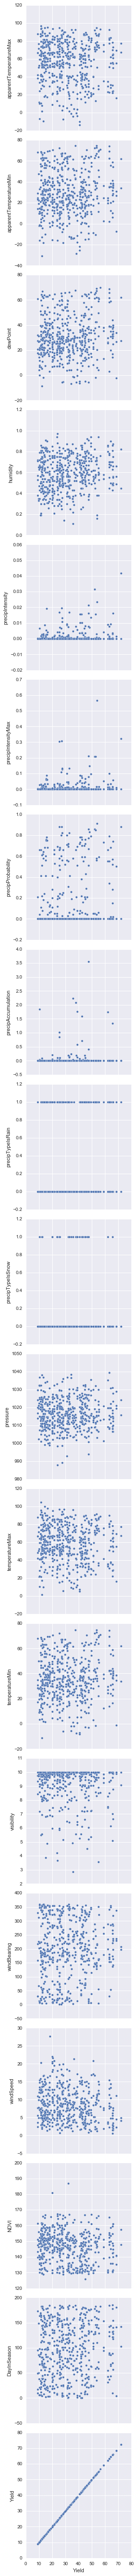

In [45]:
# Use Seaborn for viz
# Seems a bit better for automatically generating proper axes bounds...
import seaborn as sns
colNames=list(dfS.columns.values)
# If we want to remove some columns...
colNames=colNames[2:4]+colNames[5:]
# any groupings using Yield as a hue?
#g = sns.pairplot(dfS, hue="Yield")
g = sns.pairplot(dfS, y_vars=colNames, x_vars=["Yield"], size=4)

Not clear from just looking at the data if there is any link between yield and the various metrics, but let's try some simple regressions...

In [46]:
#Pearson correlation coefficient
a=df1.corr()
a['Yield']
#df1.head(2)

Latitude                  0.364207
Longitude                -0.206993
apparentTemperatureMax   -0.140315
apparentTemperatureMin   -0.049998
cloudCover                0.069506
dewPoint                  0.011607
humidity                  0.204990
precipIntensity           0.046477
precipIntensityMax        0.030030
precipProbability         0.111941
precipAccumulation        0.024285
precipTypeIsRain          0.108773
precipTypeIsSnow          0.079263
pressure                  0.063212
temperatureMax           -0.152702
temperatureMin           -0.060512
visibility               -0.092501
windBearing               0.065064
windSpeed                -0.106314
NDVI                     -0.170673
DayInSeason              -0.001171
Yield                     1.000000
Name: Yield, dtype: float64

In [47]:
#Pearson correlation coefficient
a=df2.corr()
a['Yield']
#df1.head(2)

Latitude                  0.486362
Longitude                -0.309373
apparentTemperatureMax   -0.165742
apparentTemperatureMin   -0.146381
cloudCover               -0.007271
dewPoint                 -0.158787
humidity                 -0.026934
precipIntensity          -0.015459
precipIntensityMax       -0.020094
precipProbability         0.010231
precipAccumulation        0.042825
precipTypeIsRain          0.007165
precipTypeIsSnow          0.064623
pressure                  0.045568
temperatureMax           -0.172160
temperatureMin           -0.153430
visibility                0.020855
windBearing               0.082784
windSpeed                -0.065331
NDVI                     -0.187925
DayInSeason              -0.001328
Yield                     1.000000
Name: Yield, dtype: float64

In [48]:
# No obvious strong correlations with single metrics, except lat/lon and humidity..?

In [49]:
yieldVar1=df1['Yield']
yieldVar2=df2['Yield']
df1=df1.drop('Yield',axis=1)
df2=df2.drop('Yield',axis=1)

# Drop Lat/Lon to make it a harder/fairer? test..
df1.drop('Longitude',axis=1,inplace=True)
df2.drop('Longitude',axis=1,inplace=True)
df1.drop('Latitude',axis=1,inplace=True)
df2.drop('Latitude',axis=1,inplace=True)



In [61]:
lonT=df1['Longitude'][dfS.index]
lonT

172901    0.15
156208    0.07
176200    0.04
106902    0.19
147085    0.00
83196     0.00
100894    0.03
54432     0.00
11753     0.00
6051      0.00
140874    0.41
78654     0.08
71925     0.01
95966     0.00
348       0.00
23338     0.20
57717     0.08
18937     0.23
119651    0.00
137094    0.00
164601    0.15
105976    0.02
74336     0.44
6074      0.27
24177     0.04
54527     0.04
175084    0.07
135099    0.00
144645    0.03
68964     0.96
          ... 
8939      0.00
121099    0.01
112790    0.26
168327    0.11
133725    0.04
37527     0.02
169045    0.07
79852     0.02
93041     0.00
140040    0.02
116867    0.03
149746    0.00
110066    0.05
58324     0.02
22786     0.12
113807    0.02
51208     0.06
149847    0.03
152813    0.08
134983    0.00
162129    0.08
68850     0.95
21508     0.00
121473    0.00
39254     0.16
174780    0.13
9238      0.01
103569    0.01
153246    0.08
105514    0.00
Name: cloudCover, dtype: float64

In [52]:
dfAll = pd.concat([df1, df2])
#dfS=df1.sample(500)
#dfTrain=df1.sample(frac=0.9)
#dfTrain
#dfTest =dfALL[~dfTrain.isin(dfALL)]
#dfTest.shape, dfTrain.shape

dfTrain=dfAll.sample(frac=0.8,random_state=200)
dfTest=dfAll.drop(dfTrain.index)
dfTrain.shape, dfTest.shape

((288034, 19), (15132, 19))

In [34]:
def scale_all_features(dfT):  
    # Function to normalize all columns in a Pandas dataFrame
    features = list(dfT.columns)
    dfT[features] = dfT[features].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)  
    return dfT

In [35]:
df1N = scale_all_features(df1)
df2N = scale_all_features(df2)
df1N.head()

,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason
0,0.348244,0.584587,0.00,0.589737,0.902174,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.801212,0.453616,0.575105,0.197872,0.596100,0.035973,0.192255,0.0
1,0.345483,0.629351,0.00,0.591894,0.923913,0.000654,0.000925,0.052083,0.000000,1.0,0.0,0.798750,0.448899,0.570317,0.237234,0.462396,0.030609,0.162995,0.0
2,0.337567,0.629572,0.00,0.588209,0.934783,0.000654,0.001071,0.062500,0.001026,0.0,1.0,0.798845,0.435377,0.570574,0.250000,0.440111,0.031240,0.162617,0.0
3,0.313038,0.622050,0.91,0.589197,0.934783,0.001308,0.001898,0.156250,0.001847,0.0,1.0,0.794017,0.433884,0.572454,0.243617,0.426184,0.056800,0.160543,0.0
4,0.316628,0.622419,0.91,0.592702,0.934783,0.001962,0.002677,0.250000,0.000000,1.0,0.0,0.792314,0.439072,0.571600,0.252128,0.434540,0.057116,0.160543,0.0


In [36]:
# Do something with the NaN values..
features = list(df1N.columns)
for x in features:
    # Fill the nan values with the median value, or fitting model isn't happy.
    df1N[x].fillna(df1N[x].median(), inplace=True)
    df2N[x].fillna(df2N[x].median(), inplace=True)


In [37]:
yieldVar1L = np.asarray(yieldVar1, dtype="|S6")
yieldVar2L = np.asarray(yieldVar2, dtype="|S6")
#yieldVar1L = np.asarray(yieldVar1).reshape(-1, 1)
#yieldVar1L=yieldVar1L.astype('f')
yieldVar1L

array(['35.7', '35.7', '35.7', ..., '59.0', '59.0', '59.0'], 
      dtype='|S6')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

#forest = RandomForestClassifier(max_features='sqrt')
forest = RandomForestClassifier(n_estimators = 10, n_jobs=-1)

# Fit classifier
model = forest.fit(df1N,yieldVar1L)

# Predict
guess1 = model.predict(df2N)

guess1=guess1.astype('float')

def rms(var):
    return sqrt(sum([x**2 for x in var])/size(var))

from scipy import stats
slope, intercept, r, prob, stderr = stats.linregress(guess1,yieldVar2)
rmse=rms(guess1-yieldVar2)
r, rmse

In [78]:
cross_validation = StratifiedKFold(yieldVar1L, n_folds=5)
parameter_grid = {
                 
                 'n_estimators': [10,15, 20],
                 'criterion': ['gini', 'entropy']
                 }
grid_search = GridSearchCV(forest,param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(df1N, yieldVar1L)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
guess2 = grid_search.predict(df2N)
guess2=guess2.astype('float')
guess2
slope, intercept, r, prob, stderr = stats.linregress(guess1,yieldVar2)
rmse=rms(guess1-yieldVar2)
r, rmse

Best score: 0.0570783073135
Best parameters: {'n_estimators': 20, 'criterion': 'gini'}


array([ 14.6,  12.6,  14.6, ...,  40.9,  40.9,  40.9])

In [80]:
# Look at the scatter plot of guess and actual
#fig =figure(figsize=(8,8))
#scatter(guess1, yieldVar2)
#plot(np.linspace(10,70,10), intercept+ slope*np.linspace(10,70,10))

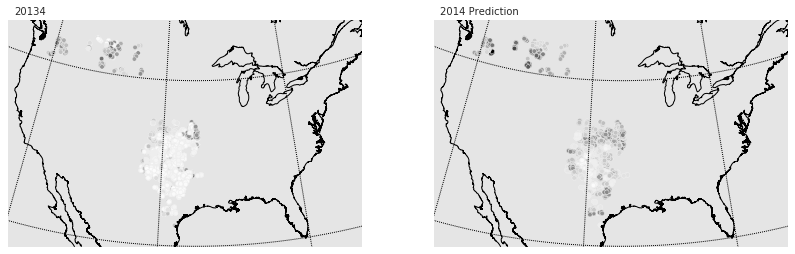

In [81]:
# Plot data for the two years
fig =figure(figsize=(14,7))
ax1=subplot(121)
im1 = m.scatter(xpts2, ypts2, c=guess1, zorder=2)
m.drawparallels(np.arange(25,65,20))
m.drawmeridians(np.arange(-120,-40,20))
m.drawcoastlines()
#m.fillcontinents()
ax1.annotate('2014', xy=(0.02, 1.02), fontsize=10,xycoords='axes fraction')
ax2=subplot(122)
im2 = m.scatter(xpts2, ypts2, c=var2, zorder=2)
m.drawparallels(np.arange(25,65,20))
m.drawmeridians(np.arange(-120,-40,20))
m.drawcoastlines()
#m.fillcontinents()
ax2.annotate('2014 Prediction', xy=(0.02, 1.02), fontsize=10, xycoords='axes fraction')
plt.show()

In [76]:
def compute_score(clf, X, y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5,scoring=scoring)
    return np.mean(xval)


In [82]:
#from sklearn.cross_validation import cross_val_score
#grid_search.fit(trainingData, yieldVar)

#print('Best score: {}'.format(grid_search.best_score_))
#print('Best parameters: {}'.format(grid_search.best_params_))
#output = grid_search.predict(testData)
#output
#xval = cross_val_score(forest, yieldGuess, yieldVar2L)

In [ ]:
#MAYBE TRAINING ON ONE YEAR AND PREDICTING ON THE NEXT ISN'T SUCH A GOOD IDEA?